In [5]:
import math, random
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import re

def vector_subtract(v, w):
    return [vi - wi for vi, wi in zip(v,w)]

def sum_of_squares(v):
    return sum(vi**2 for vi in v)

def distance(v,w):
    return math.sqrt(sum((np.array(v) - np.array(w))**2))

In [6]:
cities=[]
with open("C:\내꺼\Growth Hackers\세션\[session 8] kNN_team1\cities.txt", 'r') as f:
    lines = [line[:-1] for line in f]
for i in range(len(lines)):
    lines[i] = lines[i].split(',')
    cities.append(([float(lines[i][0]), float(lines[i][1])], lines[i][2][1:-1]))

In [8]:
def majority_vote(lang):
    vote_counts = Counter(lang)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count
                      for count in vote_counts.values()
                      if count == winner_count])
    if num_winners == 1:
        return winner
    else:
        return majority_vote(lang[:-1])

def knn_classify(k, labeled_points, new_point):
    by_distance = sorted(labeled_points,
                        key = lambda point_label: distance(point_label[0], new_point))
    k_nearest_lang = [lang for _, lang in by_distance[:k]]
    return majority_vote(k_nearest_lang)

In [33]:
#데이터 시각화

segments = []; points = []
lat_long_regex = "<point lat=\"(.*)\" lng=\"(.*)\""

with open("C:\내꺼\Growth Hackers\세션\[session 8] kNN_team1\states.txt", "r") as f:
    lines = [line for line in f]

for line in lines:
    if line.startswith("</state>"):
        for p1, p2 in zip(points, points[1:]):
            segments.append((p1, p2))
        points = []
    s = re.search(lat_long_regex, line)
    if s:
        lat, lon = s.groups()
        points.append((float(lon), float(lat)))

def plot_state_borders(plt, color="0.8"):
    for (lon1, lat1), (lon2, lat2) in segments:
        plt.plot([lon1, lon2], [lat1, lat2], color=color)

def plot_cities():
    plots = {"Java": ([],[]), "Python": ([],[]), "R": ([],[])}
    markers = {"Java": "o", "Python": "s", "R": "^"}
    colors = {"Java": "r", "Python": "b", "R": "g"}
    
    for (lon, lat), lang in cities:
        plots[lang][0].append(lon)
        plots[lang][1].append(lat)
    for lang, (x, y) in plots.items():
        plt.scatter(x,y, color=colors[lang], marker=markers[lang], label=lang, zorder=10)
    
    plot_state_borders(plt)
    plt.legend(loc=0)
    plt.axis([-130,-60,20,55])
    plt.title("Favorite Programming Languages")
    plt.show()

plot_state_borders(plt, color="0.8")
#plot_cities()

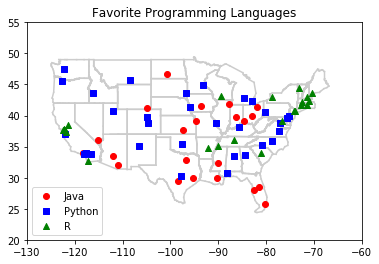

In [44]:
segments = []
points = []

lat_long_regex = "<point lat=\"(.*)\" lng=\"(.*)\""

with open("C:\내꺼\Growth Hackers\세션\[session 8] kNN_team1\states.txt", "r") as f:
    lines = [line for line in f]

for line in lines:
    if line.startswith("</state>"):
        for p1, p2 in zip(points, points[1:]):
            segments.append((p1, p2))
        points = []
    s = re.search(lat_long_regex, line)
    if s:
        lat, lon = s.groups()
        points.append((float(lon), float(lat)))

def plot_state_borders(plt, color='0.8'):
    for (lon1, lat1), (lon2, lat2) in segments:
        plt.plot([lon1, lon2], [lat1, lat2], color=color)

def plot_cities():

    # key is language, value is pair (longitudes, latitudes)
    plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }

    # we want each language to have a different marker and color
    markers = { "Java" : "o", "Python" : "s", "R" : "^" }
    colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

    for (longitude, latitude), language in cities:
        plots[language][0].append(longitude)
        plots[language][1].append(latitude)

    # create a scatter series for each language
    for language, (x, y) in plots.items():
        plt.scatter(x, y, color=colors[language], marker=markers[language],
                           label=language, zorder=10)

    plot_state_borders(plt)    # assume we have a function that does this

    plt.legend(loc=0)          # let matplotlib choose the location
    plt.axis([-130,-60,20,55]) # set the axes
    plt.title("Favorite Programming Languages")
    plt.show()

#plot_cities()

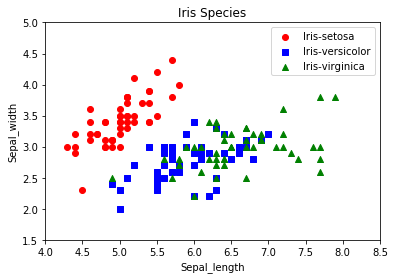

In [46]:
#Iris

with  open("C:\내꺼\Growth Hackers\세션\[session 8] kNN_team1\Iris.csv", "r") as f:
    lines = [line[:-1] for line in f]
    lines = lines[1:]
result=[]
for line in lines:
    a = line.split(',')
    b = (float(a[1]), float(a[2]), float(a[3]), float(a[4]), a[5])
    result.append(b)
iris_sepal1 = [([a,b],e) for a,b,c,d,e in result]

def plot_iris_sepal1():
    plots = { "Iris-setosa" : ([], []), "Iris-versicolor" : ([], []), "Iris-virginica" : ([], []) }
    markers = { "Iris-setosa" : "o", "Iris-versicolor" : "s", "Iris-virginica" : "^" }
    colors  = { "Iris-setosa" : "r", "Iris-versicolor" : "b", "Iris-virginica" : "g" }

    for (sepal_length, sepal_width), species in iris_sepal1:
        plots[species][0].append(sepal_length)
        plots[species][1].append(sepal_width)

    for species, (x, y) in plots.items():
        plt.scatter(x, y, color=colors[species], marker=markers[species], label=species)

    plt.legend(loc=0)
    plt.axis([4,8.5,1.5,5])                 #x축 y축 범위 설정
    plt.title("Iris Species")
    plt.xlabel("Sepal_length")
    plt.ylabel("Sepal_width")
    plt.show()

plot_iris_sepal1()

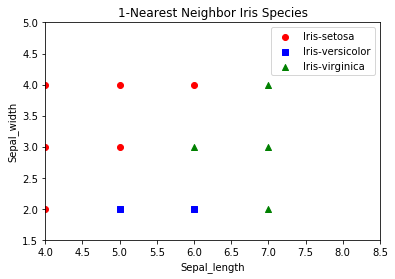

In [47]:
def classify_and_plot_grid(k=1):
    plots = { "Iris-setosa" : ([], []), "Iris-versicolor" : ([], []), "Iris-virginica" : ([], []) }
    markers = { "Iris-setosa" : "o", "Iris-versicolor" : "s", "Iris-virginica" : "^" }
    colors  = { "Iris-setosa" : "r", "Iris-versicolor" : "b", "Iris-virginica" : "g" }

    for sepal_length in range(4, 8):
        for sepal_width in range(1, 5):
            predicted_species = knn_classify(k, iris_sepal1, [sepal_length, sepal_width])
            plots[predicted_species][0].append(sepal_length)
            plots[predicted_species][1].append(sepal_width)

    for species, (x, y) in plots.items():
        plt.scatter(x, y, color=colors[species], marker=markers[species],
                          label=species)

    plt.legend(loc=0)
    plt.axis([4,8.5,1.5,5])
    plt.title(str(k) + "-Nearest Neighbor Iris Species")
    plt.xlabel("Sepal_length")
    plt.ylabel("Sepal_width")
    plt.show()

classify_and_plot_grid()

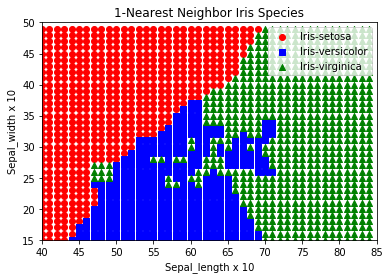

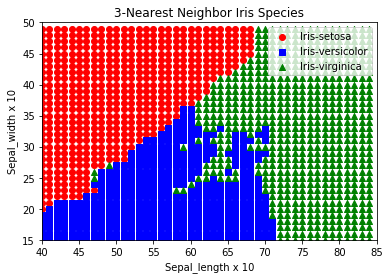

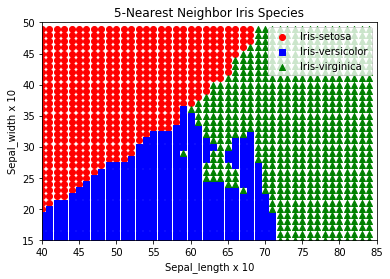

In [52]:
iris_sepal2 = [([a*10,b*10],e) for a,b,c,d,e in result]

def classify_and_plot_grid(k=1):
    plots = { "Iris-setosa" : ([], []), "Iris-versicolor" : ([], []), "Iris-virginica" : ([], []) }
    markers = { "Iris-setosa" : "o", "Iris-versicolor" : "s", "Iris-virginica" : "^" }
    colors  = { "Iris-setosa" : "r", "Iris-versicolor" : "b", "Iris-virginica" : "g" }

    for sepal_length in range(40, 85):
        for sepal_width in range(15, 50):
            predicted_species = knn_classify(k, iris_sepal2, [sepal_length, sepal_width])
            plots[predicted_species][0].append(sepal_length)
            plots[predicted_species][1].append(sepal_width)

    for species, (x, y) in plots.items():
        plt.scatter(x, y, color=colors[species], marker=markers[species],
                          label=species)

    plt.legend(loc=0)
    plt.axis([40,85,15,50])
    plt.title(str(k) + "-Nearest Neighbor Iris Species")
    plt.xlabel("Sepal_length x 10")
    plt.ylabel("Sepal_width x 10")
    plt.show()

classify_and_plot_grid(1)
classify_and_plot_grid(3)
classify_and_plot_grid(5)